In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- Pandas can easily read data stored in different file formats like CSV, JSON, XML or even Excel. Parsing always involves specifying the correct structure, encoding and other details. The read_csv method reads CSV files and accepts many parameters.

In [5]:
df = pd.read_csv('data/btc-market-price.csv') # reading csv file from the local directory.

In [6]:
df.head() # hear the first top element is consideres as a header but it is a data(instance).

2017-04-02 00:00:00  1099.169125
0  2017-04-03 00:00:00  1141.813000
1  2017-04-04 00:00:00  1141.600363
2  2017-04-05 00:00:00  1133.079314
3  2017-04-06 00:00:00  1196.307937
4  2017-04-07 00:00:00  1190.454250

In [7]:
df = pd.read_csv('data/btc-market-price.csv', header=None) # don't begin with assigning of the header header will be 0 , 1, 2 ...

In [9]:
df.head()

0            1
0  2017-04-02 00:00:00  1099.169125
1  2017-04-03 00:00:00  1141.813000
2  2017-04-04 00:00:00  1141.600363
3  2017-04-05 00:00:00  1133.079314
4  2017-04-06 00:00:00  1196.307937

In [10]:
df.columns = ['TimeStamp', 'Price'] # assigning Header

In [11]:
df.head()

TimeStamp        Price
0  2017-04-02 00:00:00  1099.169125
1  2017-04-03 00:00:00  1141.813000
2  2017-04-04 00:00:00  1141.600363
3  2017-04-05 00:00:00  1133.079314
4  2017-04-06 00:00:00  1196.307937

In [12]:
df.tail(3)

TimeStamp        Price
362  2018-03-30 00:00:00  6882.531667
363  2018-03-31 00:00:00  6935.480000
364  2018-04-01 00:00:00  6794.105000

In [14]:
df.dtypes # the timeStamp is object it suspected to be date and time.

TimeStamp     object
Price        float64
dtype: object

In [21]:
df['TimeStamp'] = pd.to_datetime(df['TimeStamp']) # changing the data type of the timeStamp column

In [29]:
df.dtypes

TimeStamp    datetime64[ns]
Price               float64
dtype: object

In [31]:
df.set_index('TimeStamp', inplace=True) # setting timeStamp as index in a data fram.

In [32]:
df

Price
TimeStamp              
2017-04-02  1099.169125
2017-04-03  1141.813000
2017-04-04  1141.600363
2017-04-05  1133.079314
2017-04-06  1196.307937
...                 ...
2018-03-28  7960.380000
2018-03-29  7172.280000
2018-03-30  6882.531667
2018-03-31  6935.480000
2018-04-01  6794.105000

[365 rows x 1 columns]

In [34]:
df.loc['2017-09-29'] # search by indexing using loc

Price    4193.574667
Name: 2017-09-29 00:00:00, dtype: float64

### putting all in one

In [35]:
df = pd.read_csv('data/btc-market-price.csv', header=None) # pretty much similar to the previous
df.columns = ['Timestamp', 'Price']
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

In [36]:
df.head() 

Price
Timestamp              
2017-04-02  1099.169125
2017-04-03  1141.813000
2017-04-04  1141.600363
2017-04-05  1133.079314
2017-04-06  1196.307937

### Plotting basics

<AxesSubplot: xlabel='Timestamp'>

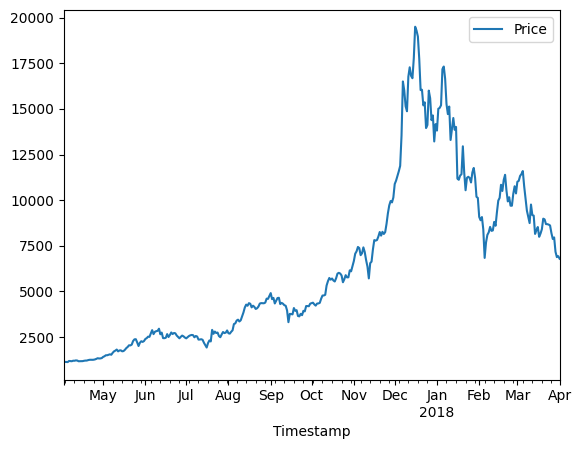

In [37]:
df.plot()

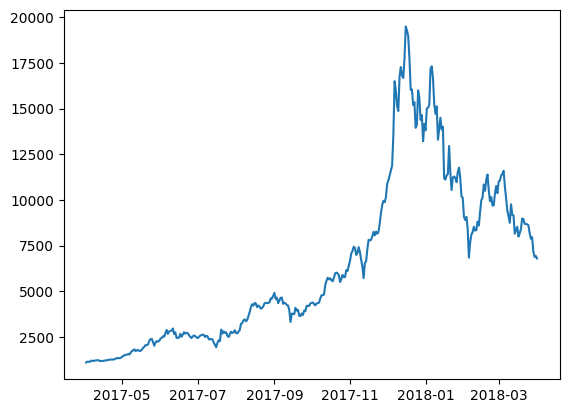

In [38]:
plt.plot(df.index, df['Price'])

* plt.plot() accepts many parameters

In [42]:
x = np.arange(-10, 11)

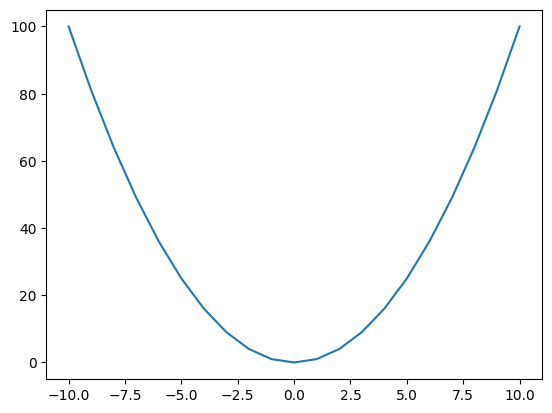

In [43]:
plt.plot(x, x ** 2) # plotting x^2 in a rang of -10 to 11

* Each plt function alters the global state. If you want to set settings of your plot you can use the plt.figure function. Others like plt.title keep altering the global plot:

Text(0.5, 1.0, 'My Nice Plot')

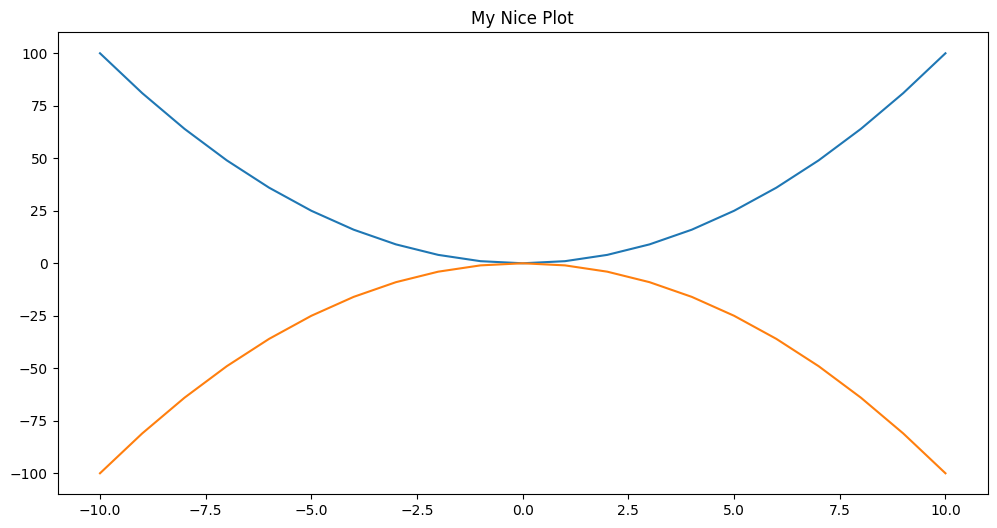

In [44]:
plt.figure(figsize=(12, 6)) # figsize(width, height)
plt.plot(x, x ** 2)
plt.plot(x, -1 * (x ** 2))

plt.title('My Nice Plot')

<AxesSubplot: title={'center': 'Bitcoin Price 2017-2018'}, xlabel='Timestamp'>

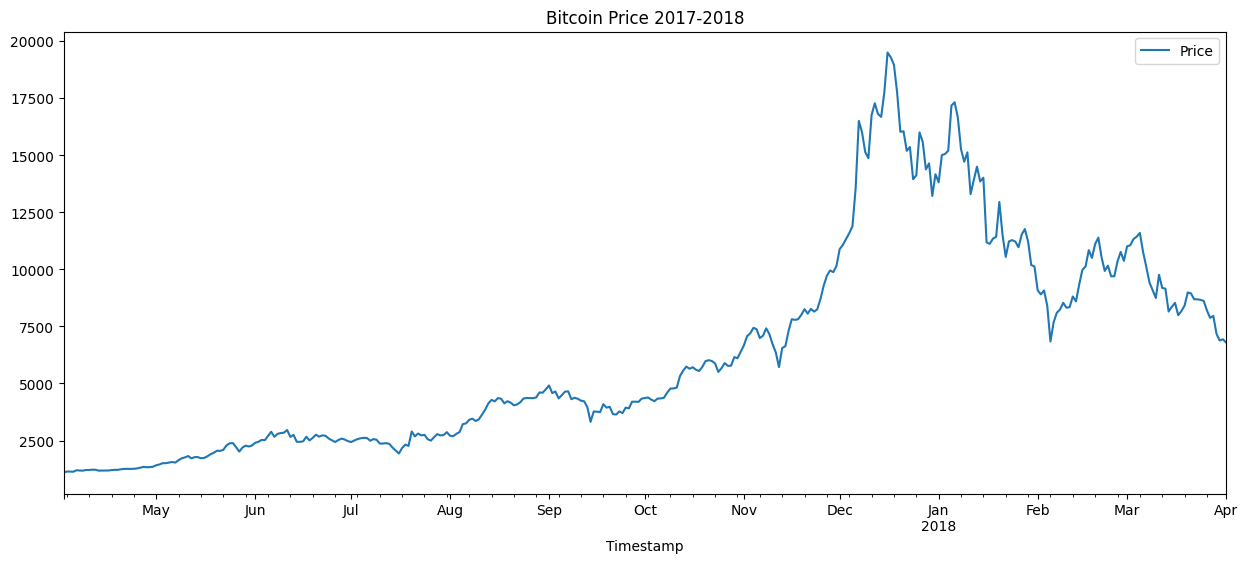

In [46]:
df.plot(figsize = (15, 6), title='Bitcoin Price 2017-2018')

In [47]:
eth = pd.read_csv('data/eth-price.csv')
eth.head() # the csv file have title in the first row

Date(UTC)  UnixTimeStamp  Value
0  4/2/2017     1491091200  48.55
1  4/3/2017     1491177600  44.13
2  4/4/2017     1491264000  44.43
3  4/5/2017     1491350400  44.90
4  4/6/2017     1491436800  43.23

In [52]:
eth.dtypes

Date(UTC)         object
UnixTimeStamp      int64
Value            float64
dtype: object

In [53]:
eth['Date(UTC)'] = pd.to_datetime(eth['Date(UTC)']) # changing the Date(UTC) colomn object type to datetime type.
eth.dtypes

Date(UTC)        datetime64[ns]
UnixTimeStamp             int64
Value                   float64
dtype: object

* Putting everything together again:

In [54]:
eth = pd.read_csv('data/eth-price.csv', parse_dates=True, index_col=0)
print(eth.info())

eth.head().

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 362 entries, 2017-04-02 to 2018-04-01
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UnixTimeStamp  362 non-null    int64  
 1   Value          362 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.5 KB
None


UnixTimeStamp  Value
Date(UTC)                       
2017-04-02     1491091200  48.55
2017-04-03     1491177600  44.13
2017-04-04     1491264000  44.43
2017-04-05     1491350400  44.90
2017-04-06     1491436800  43.23

* We can now combine both DataFrames into one. Both have the same index, so aligning both prices will be easy. Let's first create an empty DataFrame and with the index from Bitcoin prices:

In [55]:
prices = pd.DataFrame(index=df.index) # creating price dataFrame

In [56]:
prices.head()

Empty DataFrame
Columns: []
Index: [2017-04-02 00:00:00, 2017-04-03 00:00:00, 2017-04-04 00:00:00, 2017-04-05 00:00:00, 2017-04-06 00:00:00]

* And we can now just set columns from the other DataFrames:

In [57]:
prices['Bitcoin'] = df['Price'] # adding new col to prices from df dataFrame

In [58]:
prices['Ether'] = eth['Value'] # adding new col to prices from eth dataFrame

In [60]:
prices.head() 

Bitcoin  Ether
Timestamp                     
2017-04-02  1099.169125  48.55
2017-04-03  1141.813000  44.13
2017-04-04  1141.600363  44.43
2017-04-05  1133.079314  44.90
2017-04-06  1196.307937  43.23

<AxesSubplot: xlabel='Timestamp'>

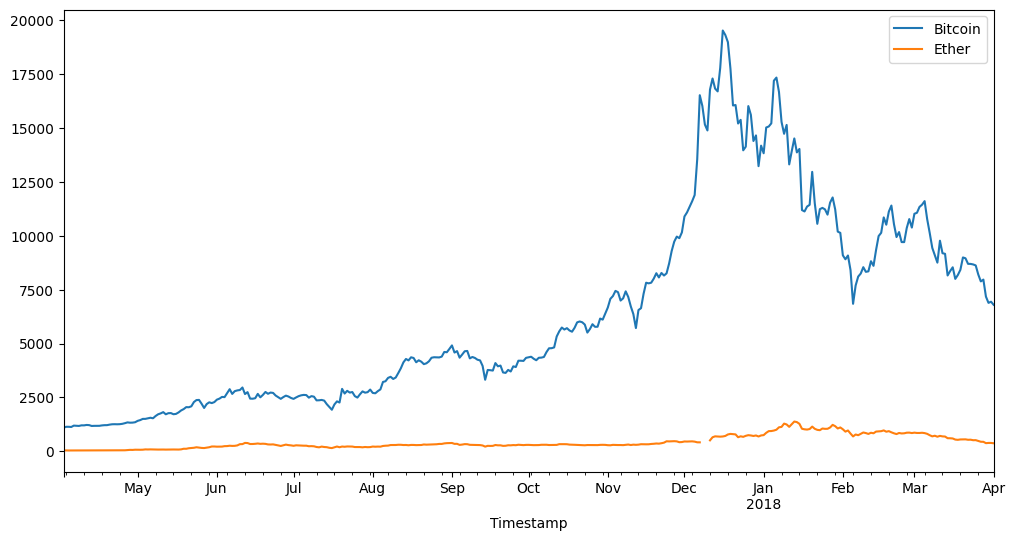

In [63]:
prices.plot(figsize= (12, 6) ) # we can see esily the missing data here.

<AxesSubplot: xlabel='Timestamp'>

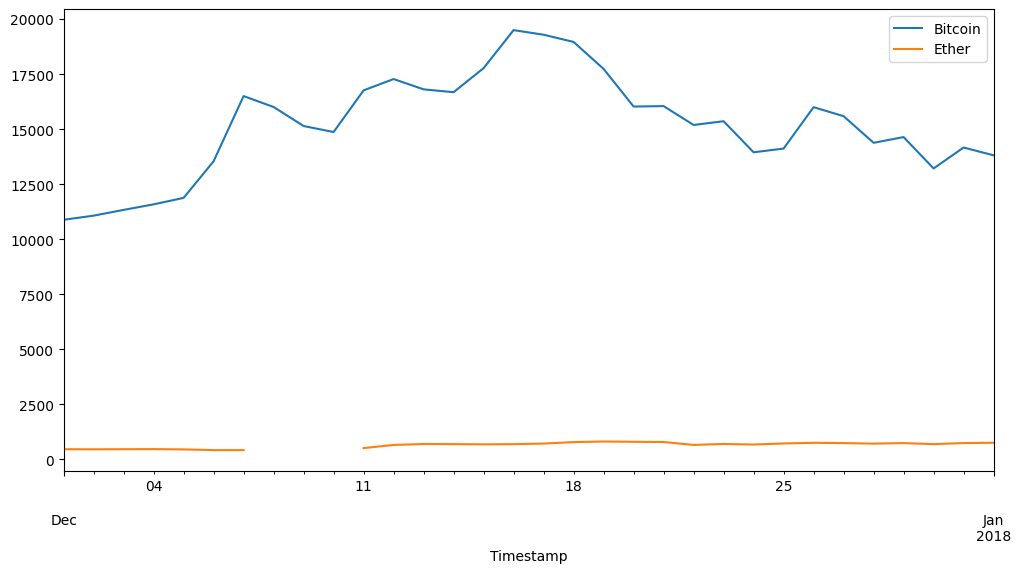

In [64]:
prices.loc['2017-12-01':'2018-01-01'].plot(figsize = (12, 6)) # maximizing the graph by looking at the end 2017 to beg 2018

* we can see the missing data esily 